### **TRABAJO PRÁCTICO 2 APRENDIZAJE AUTOMÁTICO I TUIA 2024**



INTEGRANTES:

Herrera Morena (H-1187/8)

Zorzolo Rubio Juana (Z-1217/3)

En este trabajo, se tiene como objetivo predecir la probabilidad de lluvia al día siguiente en diversas ciudades de Australia, utilizando la variable 'RainTomorrow' del conjunto de datos weatherAUS.csv. Para lograr esta predicción, empleamos un conjunto de características climáticas, como la dirección y velocidad del viento, la temperatura y la humedad, entre otras.

Se utilizan técnicas de clasificación como la regresión logística y redes neuronales, además de métodos de optimización como la validación cruzada y la búsqueda de hiperparámetros. También se implementarán enfoques de regularización y explicabilidad mediante herramientas como SHAP, con el fin de mejorar la interpretación y precisión de los modelos seleccionados. El trabajo concluye con la comparación de los distintos modelos para determinar cuál ofrece el mejor rendimiento en la predicción de la variable objetivo.

Variables y Significados

- Date: Fecha de la observación meteorológica.

- Location: Nombre del lugar donde se registró la observación meteorológica.

- MinTemp: Temperatura mínima registrada durante el día (en °C).

- MaxTemp: Temperatura máxima registrada durante el día (en °C).

- Rainfall: Cantidad de lluvia registrada durante el día (en mm).

- Evaporation: Cantidad de evaporación observada durante el día (en mm).

- Sunshine: Número de horas de sol brillante durante el día.

- WindGustDir: Dirección de la ráfaga de viento más fuerte durante el día.

- WindGustSpeed: Velocidad de la ráfaga de viento más fuerte durante el día (en km/h).

- WindDir9am: Dirección del viento a las 9 a.m.

- WindDir3pm: Dirección del viento a las 3 p.m.

- WindSpeed9am: Velocidad del viento a las 9 a.m. (en km/h).

- WindSpeed3pm: Velocidad del viento a las 3 p.m. (en km/h).

- Humidity9am: Humedad relativa a las 9 a.m. (en porcentaje).

- Humidity3pm: Humedad relativa a las 3 p.m. (en porcentaje).

- Pressure9am: Presión atmosférica a las 9 a.m. (en hPa).

- Pressure3pm: Presión atmosférica a las 3 p.m. (en hPa).

- Cloud9am: Cobertura de nubes a las 9 a.m. (medido en oktas, una unidad de cobertura nubosa).

- Cloud3pm: Cobertura de nubes a las 3 p.m. (medido en oktas).

- Temp9am: Temperatura a las 9 a.m. (en °C).

- Temp3pm: Temperatura a las 3 p.m. (en °C).

- RainToday: Indica si llovió hoy (Sí/No).

- RainTomorrow: Indica si se espera que llueva mañana (Sí/No).

# Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import PowerTransformer, RobustScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import LinearSegmentedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.impute import SimpleImputer

In [2]:
!gdown "12Cu0b2V5ggyQPBlE9DbV8MC3PS8nC5IO" --output "weatherAUS.csv"

Downloading...
From: https://drive.google.com/uc?id=12Cu0b2V5ggyQPBlE9DbV8MC3PS8nC5IO
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 46.5MB/s]


In [3]:
df_weather = pd.read_csv('weatherAUS.csv')
df_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Seleccionar 10 ciudades aleatorias con random_state = 42 para siempre obtener los mismos resultados
ciudades_aleatorias = df_weather['Location'].sample(n=10, random_state=42)
df_weather = df_weather[df_weather['Location'].isin(ciudades_aleatorias)]
df_weather['Location'].value_counts()

,count
Location,
Sydney,3344
Melbourne,3193
Albury,3040
Wollongong,3040
GoldCoast,3040
MountGambier,3040
Richmond,3009
PerthAirport,3009


## Información general

In [5]:
df_weather.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24180.000000,24184.000000,23736.000000,13745.000000,12121.000000,23310.000000,24552.000000,24571.000000,24095.000000,24094.000000,24125.000000,24144.000000,14111.000000,14229.000000,24148.000000,24141.000000
mean,12.698023,22.958200,2.582685,4.840800,7.227630,41.324410,15.122149,20.275202,69.369911,53.825724,1018.126006,1015.779825,4.944795,4.813480,17.100538,21.433317
std,5.542904,6.060849,8.658253,3.400684,3.877842,14.627816,9.793927,9.447507,17.237774,19.043083,7.071843,6.953582,2.821377,2.733128,5.608510,5.863250
min,-4.800000,6.800000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,9.000000,4.000000,985.100000,982.900000,0.000000,0.000000,0.300000,5.300000
25%,8.800000,18.500000,0.000000,2.200000,4.200000,31.000000,7.000000,13.000000,58.000000,40.000000,1013.400000,1011.100000,2.000000,2.000000,13.000000,17.200000
50%,12.700000,22.500000,0.000000,4.000000,7.800000,39.000000,13.000000,20.000000,70.000000,54.000000,1018.200000,1015.800000,6.000000,6.000000,17.100000,21.000000
75%,17.000000,26.900000,1.000000,6.800000,10.300000,50.000000,20.000000,26.000000,82.000000,67.000000,1022.900000,1020.500000,7.000000,7.000000,21.200000,25.100000
max,28.600000,47.000000,192.000000,37.200000,14.300000,126.000000,87.000000,87.000000,100.000000,100.000000,1039.900000,1037.800000,9.000000,8.000000,39.400000,45.900000


In [6]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24715 entries, 0 to 120637
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24715 non-null  object 
 1   Location       24715 non-null  object 
 2   MinTemp        24180 non-null  float64
 3   MaxTemp        24184 non-null  float64
 4   Rainfall       23736 non-null  float64
 5   Evaporation    13745 non-null  float64
 6   Sunshine       12121 non-null  float64
 7   WindGustDir    23307 non-null  object 
 8   WindGustSpeed  23310 non-null  float64
 9   WindDir9am     22917 non-null  object 
 10  WindDir3pm     24414 non-null  object 
 11  WindSpeed9am   24552 non-null  float64
 12  WindSpeed3pm   24571 non-null  float64
 13  Humidity9am    24095 non-null  float64
 14  Humidity3pm    24094 non-null  float64
 15  Pressure9am    24125 non-null  float64
 16  Pressure3pm    24144 non-null  float64
 17  Cloud9am       14111 non-null  float64
 18  Cloud3pm  

# Codificación de variables categóricas

## 'RainToday' y 'RainTomorrow'

In [7]:
df_weather['RainToday'] = df_weather['RainToday'].map({'Yes': 1, 'No': 0})
df_weather['RainTomorrow'] = df_weather['RainTomorrow'].map({'Yes': 1, 'No': 0})

df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather = df_weather.sort_values(by='Date')

## 'WindGustDir', 'WindDir9am' y 'WindDir3pm'

La conversión de variables cualitativas mediante One-Hot Encoding (get_dummies()) puede generar un gran número de nuevas variables. Esto puede llevar a un incremento en la dimensionalidad del dataset, lo que puede complejizar el modelo.

Por ellos, decidimos ver la influencia de las variables 'WindGustDir', 'WindDir9am' y 'WindDir3pm' en la targuet para saber si su codificación es redundante o no. Basado en los resultados se decide continuar con el proceso de codificación o eliminarlas para reducir posibles dificultades.

In [8]:
cuantitativas = df_weather.select_dtypes(include=['float64', 'int64'])

# Aplicar One-Hot Encoding para las columnas categóricas
df_sin_location = df_weather.drop(columns=['Location'])
df_encoded = pd.get_dummies(df_sin_location, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'], drop_first=True)

# Concatenar las variables cuantitativas con las variables codificadas
df_combined = pd.concat([cuantitativas, df_encoded.drop(columns=cuantitativas.columns)], axis=1)

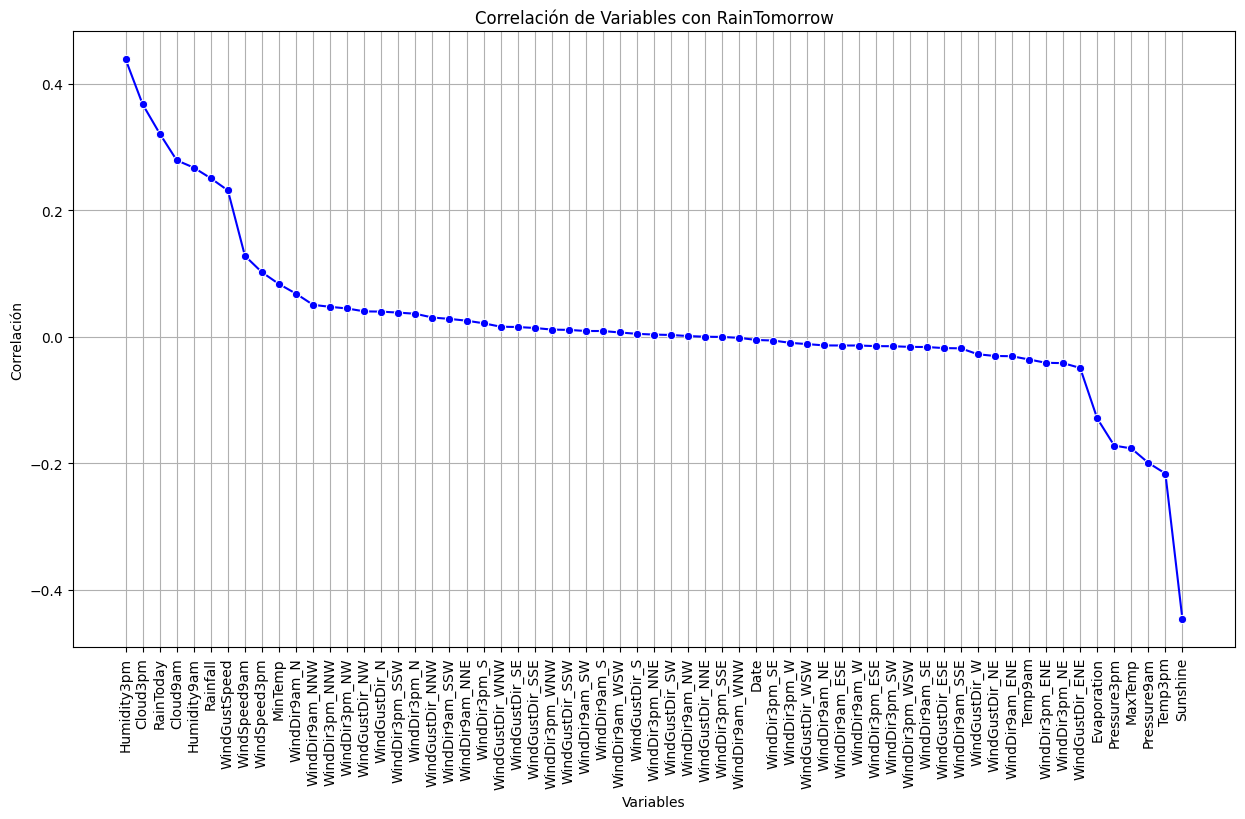

In [9]:
# Calcular las correlaciones de cada variable con 'RainTomorrow'
correlations_with_rain = df_combined.corrwith(df_combined['RainTomorrow']).sort_values(ascending=False)
correlations_with_rain = correlations_with_rain.drop('RainTomorrow')

plt.figure(figsize=(15, 8))
sns.lineplot(x=correlations_with_rain.index, y=correlations_with_rain.values, marker='o', color='b')
plt.xticks(rotation=90)
plt.title('Correlación de Variables con RainTomorrow')
plt.ylabel('Correlación')
plt.xlabel('Variables')
plt.grid(True)
plt.show()

Se observa que en específico las variables codificadas ('WindGustDir', 'WindDir9am' y 'WindDir3pm') no aportan valor predictivo significativo a la targuet. De esta manera, decidimos eliminarlas para evitar complicaciones innecesarias en el modelo.

In [10]:
df_weather = df_weather.drop(columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])

# Análisis Descriptivo

Decidimos realizar el análisis descriptivo previo a la limpieza de datos ya que nos ayuda a entender mejor el conjunto de datos. Este análisis nos permite identificar patrones y problemas, lo que a su vez nos ayuda a tomar decisiones informadas en las siguientes etapas del procesamiento de datos.

## Matriz de correlación

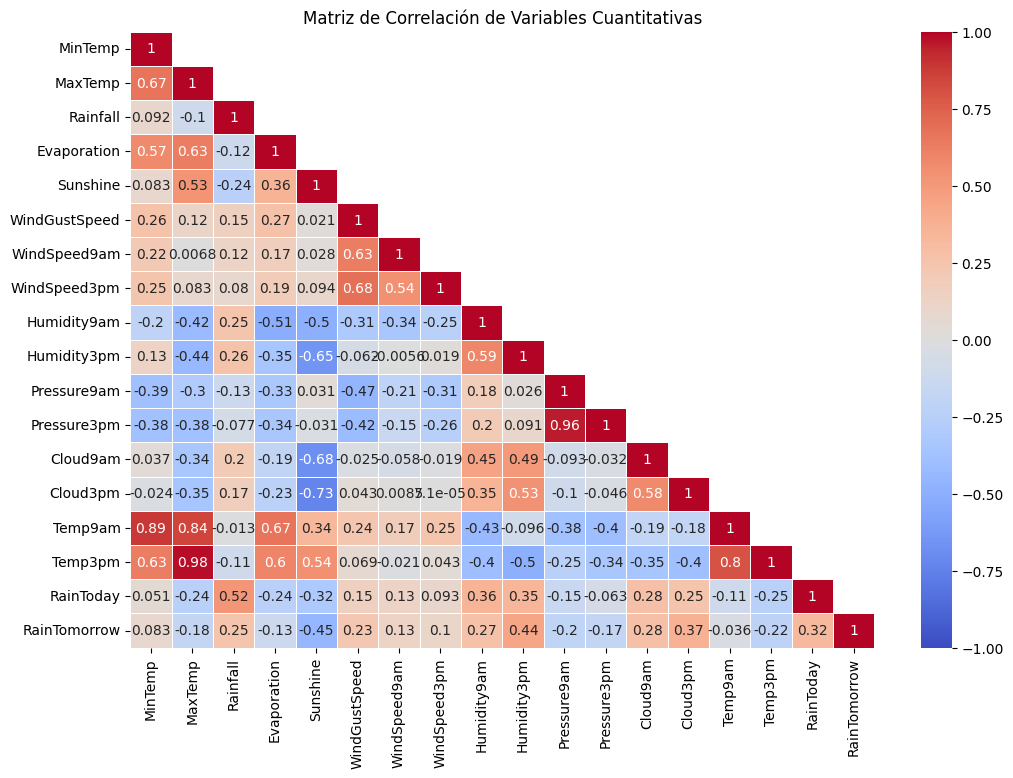

In [11]:
cuantitativas = df_weather.select_dtypes(include=['float64', 'int64'])
corr_matrix = cuantitativas.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Matriz de Correlación de Variables Cuantitativas')
plt.show()

Dada la matriz de correlación, decidimos observar en detalle con un scatterplot la relación entre las variables que presentan una correlación lineal inversa o directa más fuerte.

## Relación entre Temp3pm y MaxTemp

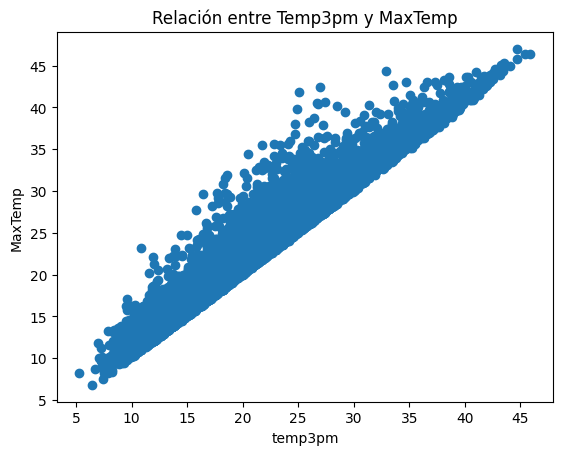

In [12]:
plt.scatter(df_weather['Temp3pm'], df_weather['MaxTemp'])
plt.xlabel('temp3pm')
plt.ylabel('MaxTemp')
plt.title('Relación entre Temp3pm y MaxTemp')
plt.show()

## Relación entre Temp9am y MinTemp

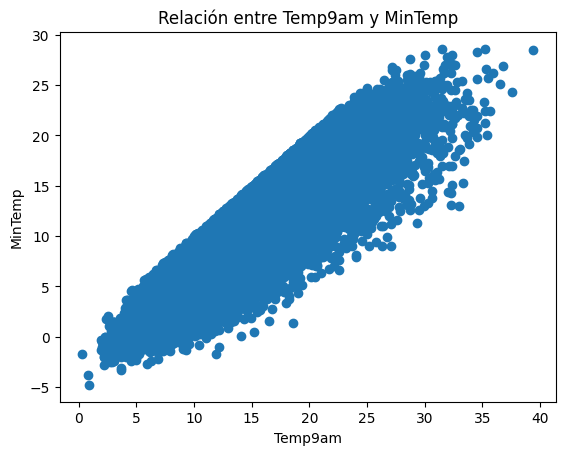

In [13]:
plt.scatter(df_weather['Temp9am'], df_weather['MinTemp'])
plt.xlabel('Temp9am')
plt.ylabel('MinTemp')
plt.title('Relación entre Temp9am y MinTemp')
plt.show()

## Relación entre Pressure3pm y Pressure9am

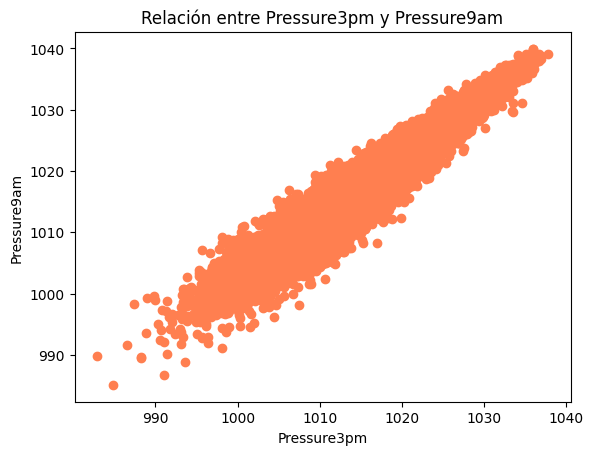

In [14]:
plt.scatter(df_weather['Pressure3pm'], df_weather['Pressure9am'], color='coral')
plt.xlabel('Pressure3pm')
plt.ylabel('Pressure9am')
plt.title('Relación entre Pressure3pm y Pressure9am')
plt.show()

Conclusión: Todos los gráficos muestran una correlación positiva entre las dos variables seelccionadas, con una ligera dispersión en ciertos puntos, lo cual podría ser un área interesante para investigar con mayor profundidad, como por ejemplo si esos puntos corresponden a días con condiciones climáticas atípicas.

## humidity3pm según raintomorrow

<ipython-input-15-9c34341922b4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df_weather, palette='Set3')


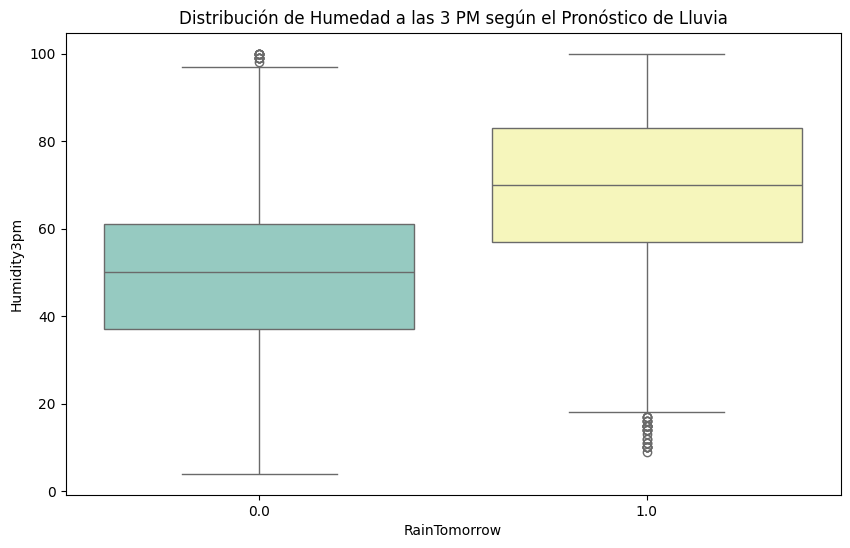

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df_weather, palette='Set3')
plt.title('Distribución de Humedad a las 3 PM según el Pronóstico de Lluvia')
plt.show()

Conclusión: Se observa como la influencia de la humedad a las 3pm afecta a RainTomorrow. Llueve con mayor presencia de humedad.

# Eliminar filas con valores nulos

Antes de realizar la partición del data, la primer decisión que tomamos fue eliminar las filas que contengan más del 70% de variables con valores nulos, ya que consideramos que es muy probable que la información que contienen sea insuficiente o poco representativa para realizar un análisis adecuado. Mantener estas filas podría generar ruido en el modelo.

In [16]:
filas_nan = df_weather[df_weather.isna().sum(axis=1) > 15]
q_filas_nan = len(filas_nan)
df_weather = df_weather.dropna(thresh=df_weather.shape[1] - 15)

# Partición de datos

Separamos las variables independientes (X) de la variable dependiente (y), que en nuestro trabajo es la variable RainTomorrow (a quien queremos predecir).

In [17]:
X = df_weather.drop("RainTomorrow", axis=1)
y = df_weather["RainTomorrow"]

Dividimos también los datos en TRAIN y TEST, fundamental para poder entrenar nuestro modelo y luego testearlo.

Decidimos separar un 80% para entrenamiento, y el 20% restante para prueba.

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19763, 19), (4941, 19), (19763,), (4941,))

In [20]:
# Combinamos los datas de entrenamiento y los de testeo para mayor facilidad al momento de trabajarlos
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Limpieza de datos

## Valores nulos

### Para df_train

Tomamos la decisión de imputar los valores faltantes:

- A las  variables categóricas con la moda.

- Al resto de las variables con la mediana ya que es una medida más robusta.

In [21]:
df_train['RainToday'] = df_train['RainToday'].fillna(df_train['RainToday'].mode().iloc[0])
df_train['RainTomorrow'] = df_train['RainTomorrow'].fillna(df_train['RainTomorrow'].mode().iloc[0])

In [22]:
imputer = SimpleImputer(strategy='median')
df_train[df_train.select_dtypes(include=['float64']).columns] = imputer.fit_transform(df_train.select_dtypes(include=['float64']))

Confirmamos los cambios realizados:

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19763 entries, 151 to 33388
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           19763 non-null  datetime64[ns]
 1   Location       19763 non-null  object        
 2   MinTemp        19763 non-null  float64       
 3   MaxTemp        19763 non-null  float64       
 4   Rainfall       19763 non-null  float64       
 5   Evaporation    19763 non-null  float64       
 6   Sunshine       19763 non-null  float64       
 7   WindGustSpeed  19763 non-null  float64       
 8   WindSpeed9am   19763 non-null  float64       
 9   WindSpeed3pm   19763 non-null  float64       
 10  Humidity9am    19763 non-null  float64       
 11  Humidity3pm    19763 non-null  float64       
 12  Pressure9am    19763 non-null  float64       
 13  Pressure3pm    19763 non-null  float64       
 14  Cloud9am       19763 non-null  float64       
 15  Cloud3pm       19763 n

### Para df_test

Se aplicaron las mismas decisiones para df_test.

In [24]:
df_test['RainToday'] = df_test['RainToday'].fillna(df_test['RainToday'].mode().iloc[0])
df_test['RainTomorrow'] = df_test['RainTomorrow'].fillna(df_test['RainTomorrow'].mode().iloc[0])

In [25]:
df_test[df_test.select_dtypes(include=['float64']).columns] = imputer.transform(df_test.select_dtypes(include=['float64']))

Confirmamos los cambios realizados:

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4941 entries, 31098 to 28972
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           4941 non-null   datetime64[ns]
 1   Location       4941 non-null   object        
 2   MinTemp        4941 non-null   float64       
 3   MaxTemp        4941 non-null   float64       
 4   Rainfall       4941 non-null   float64       
 5   Evaporation    4941 non-null   float64       
 6   Sunshine       4941 non-null   float64       
 7   WindGustSpeed  4941 non-null   float64       
 8   WindSpeed9am   4941 non-null   float64       
 9   WindSpeed3pm   4941 non-null   float64       
 10  Humidity9am    4941 non-null   float64       
 11  Humidity3pm    4941 non-null   float64       
 12  Pressure9am    4941 non-null   float64       
 13  Pressure3pm    4941 non-null   float64       
 14  Cloud9am       4941 non-null   float64       
 15  Cloud3pm       4941 n

## Valores atípicos

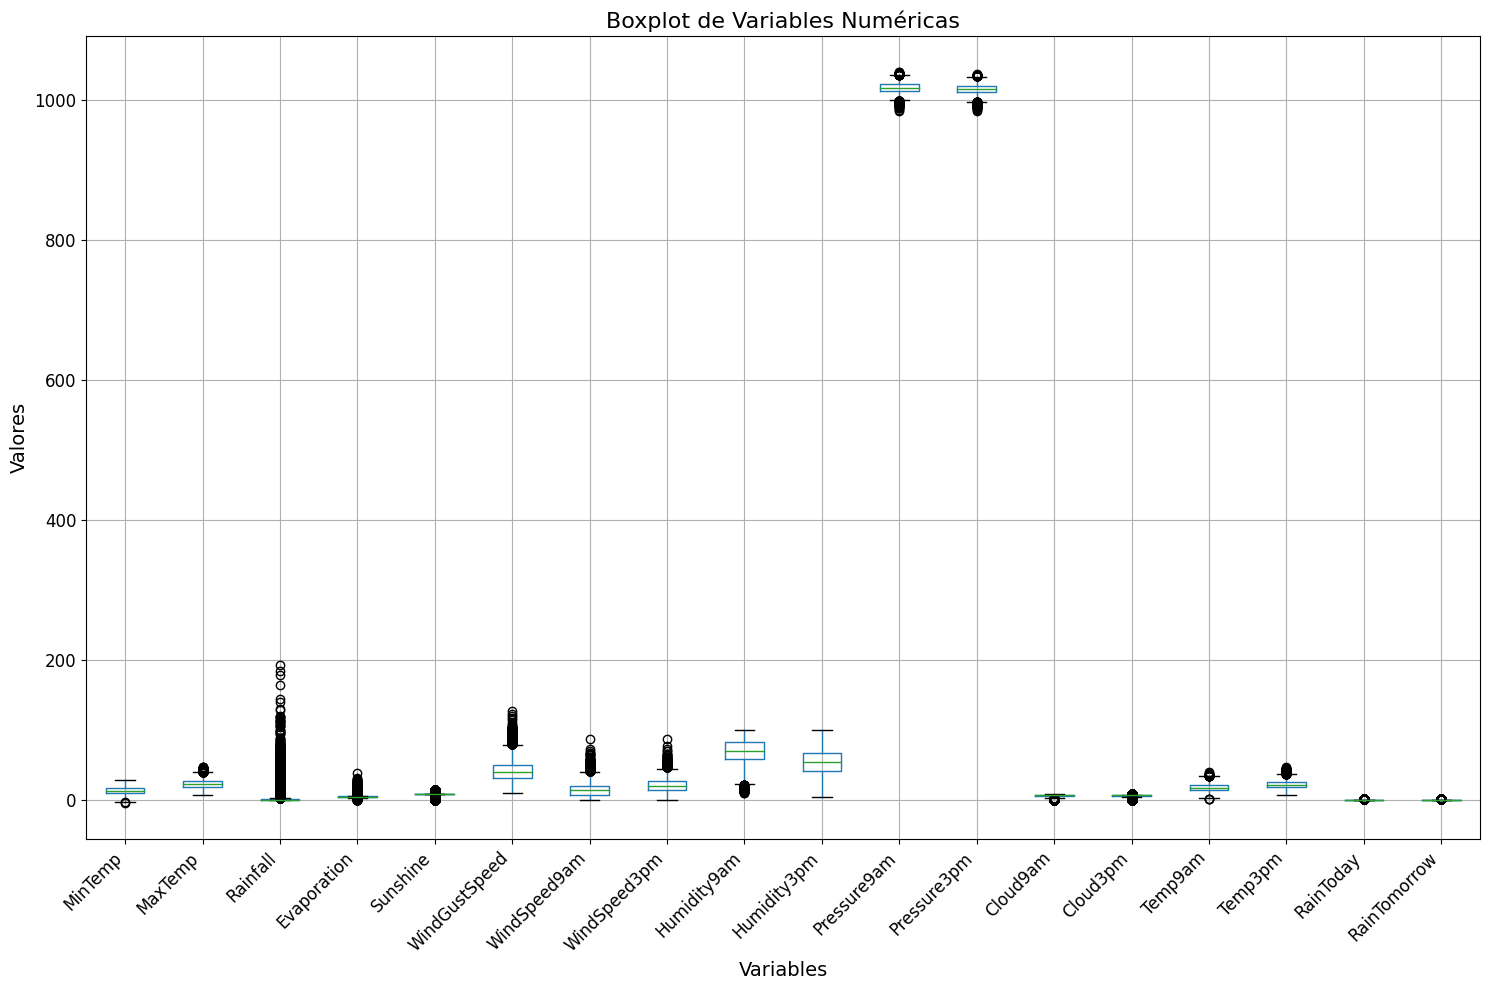

In [27]:
df_train.boxplot(figsize=(15, 10))
plt.title("Boxplot de Variables Numéricas", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Variables", fontsize=14)
plt.ylabel("Valores", fontsize=14)
plt.tight_layout()
plt.show()

Teniendo en cuenta el boxplot, decidimos graficar las variables con mayor cantidad de valores atípicos para comprender si el origen de estos se debe a algún otro factor.

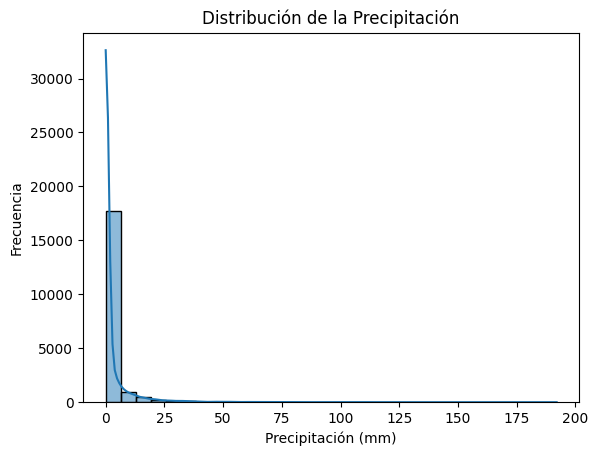

In [28]:
sns.histplot(df_train['Rainfall'], bins=30, kde=True)
plt.title('Distribución de la Precipitación')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')
plt.show()

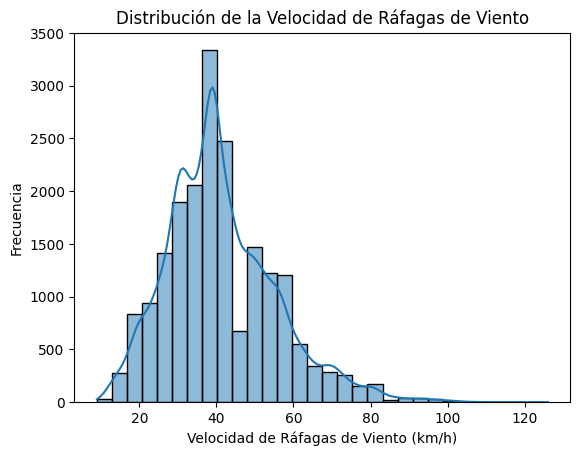

In [29]:
sns.histplot(df_train['WindGustSpeed'], bins=30, kde=True)
plt.title('Distribución de la Velocidad de Ráfagas de Viento')
plt.xlabel('Velocidad de Ráfagas de Viento (km/h)')
plt.ylabel('Frecuencia')
plt.show()

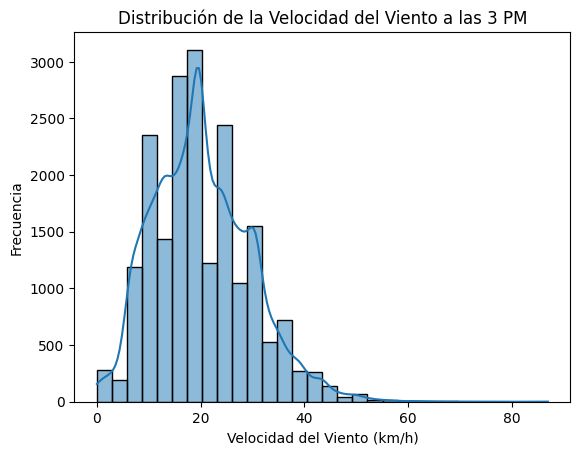

In [30]:
sns.histplot(df_train['WindSpeed3pm'], bins=30, kde=True)
plt.title('Distribución de la Velocidad del Viento a las 3 PM')
plt.xlabel('Velocidad del Viento (km/h)')
plt.ylabel('Frecuencia')
plt.show()

Conclusión: Pudimos observar que estos outliers se deben a una asimetría en la distribución de las variables. De esta manera, decidimos no realizar ningún tratamiento de outliers ya que no lo consideramos necesario. Además, eliminarlos o ajustarlos podría distorsionar la interpretación real de los datos.

## Escalado de datos

### Para df_train

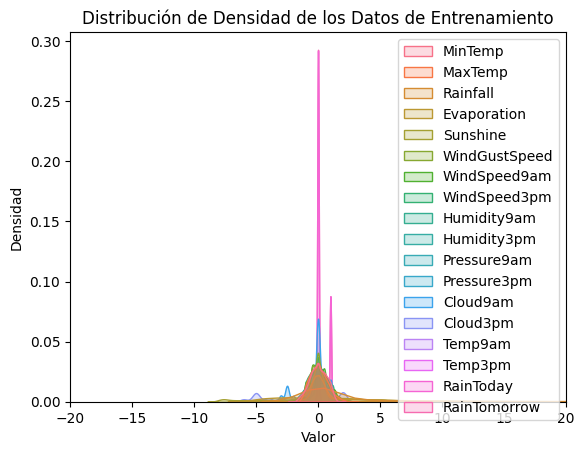

In [31]:
# Seleccionar las columnas flotantes, excluyendo 'RainTomorrow' y 'RainToday'
float_columns = df_train.select_dtypes(include=['float64']).columns
columns_to_scale = [col for col in float_columns if col not in ['RainTomorrow', 'RainToday']]

scaler = RobustScaler()
df_train[columns_to_scale] = scaler.fit_transform(df_train[columns_to_scale])

sns.kdeplot(data=df_train, fill=True)
plt.title('Distribución de Densidad de los Datos de Entrenamiento')
plt.xlim(-20, 20)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

### Para df_test

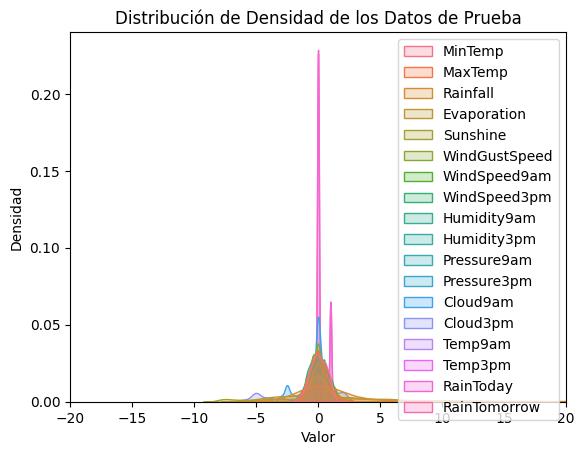

In [32]:
# Seleccionar las columnas flotantes, excluyendo 'RainTomorrow' y 'RainToday'
float_columns = df_test.select_dtypes(include=['float64']).columns
columns_to_scale = [col for col in float_columns if col not in ['RainTomorrow', 'RainToday']]
df_test[columns_to_scale] = scaler.transform(df_test[columns_to_scale])

sns.kdeplot(data=df_test, fill=True)
plt.title('Distribución de Densidad de los Datos de Prueba')
plt.xlim(-20, 20)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

# Balanceo del dataset (en variable target)

In [33]:
# Separar variables dependientes de independientes tanto para el data de entrenamiento como para el de prueba.
X_train = df_train.drop(columns='RainTomorrow')
y_train = df_train['RainTomorrow']

X_test = df_test.drop(columns='RainTomorrow')
y_test = df_test['RainTomorrow']

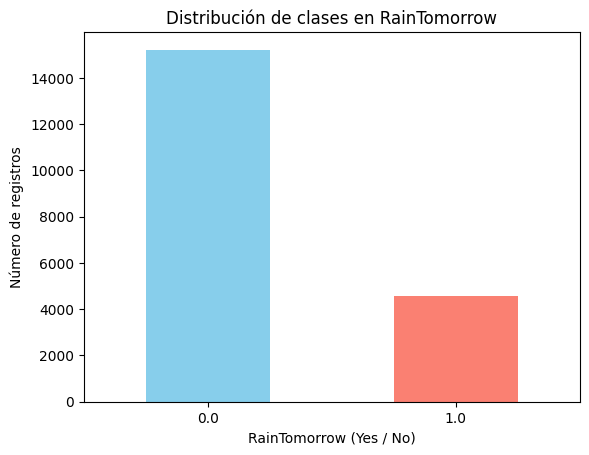

RainTomorrow
0.0    15214
1.0     4549
Name: count, dtype: int64


In [34]:
rain_tomorrow_counts = y_train.value_counts()

rain_tomorrow_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de clases en RainTomorrow')
plt.ylabel('Número de registros')
plt.xlabel('RainTomorrow (Yes / No)')
plt.xticks(rotation=0)
plt.show()

print(rain_tomorrow_counts)

Conclusión: El gráfico muestra un claro desbalance en la variable objetivo RainTomorrow. Aproximadamente el 77% de los días no llueve (0), mientras que el 23% de los días sí llueve (1). Este desbalance puede afectar negativamente el rendimiento de un modelo predictivo, ya que el modelo podría sesgarse hacia predecir mayoritariamente "No". Para abordar este problema, se utilizan técnicas como el ajuste de pesos de clase, sobremuestreo o submuestreo. En nuestro caso particular, utilizamos Smote.

## SMOTE

In [35]:
# Eliminar la columna de fecha y ciudad antes de aplicar SMOTE
X_train_cuantitativo = X_train.drop(columns=['Date', 'Location'])

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_cuantitativo, y_train)

print("Distribución original de la clase target:", y_train.value_counts())
print("Distribución después de SMOTE:", y_train_resampled.value_counts())

Distribución original de la clase target: RainTomorrow
0.0    15214
1.0     4549
Name: count, dtype: int64
Distribución después de SMOTE: RainTomorrow
0.0    15214
1.0    15214
Name: count, dtype: int64


Conclusión:

La distribución original de la targuet eran 15214 instancias de la clase 0 y 4549 de la clase 1, donde la clase 0 era mucho más dominante que la clase 1.

Luego de aplicar SMOTE, observamos que el balance de clases se justó significativamente.
Ahora, son 15214 instancias para ambas clases. El proceso se basa en generar instancias sintéticas de la clase minoritaria (1) para igualar a las de la clase mayoritaria (0).

# Regresión Logística

In [36]:
X_test_cuantitativo = X_test.drop(columns=['Date', 'Location'])

model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones y probabilidades en el conjunto de prueba
y_pred = model.predict(X_test_cuantitativo)
y_proba = model.predict_proba(X_test_cuantitativo)[:, 1]

In [37]:
# Calcular las métricas para cada clase
accuracy = accuracy_score(y_test, y_pred)

precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)

print(f"\nPrecisión general (Accuracy): {accuracy:.2f}")
print("Clase 0.0:")
print(f"  Precisión: {precision_0:.2f}")
print(f"  Recall: {recall_0:.2f}")
print(f"  F1-score: {f1_0:.2f}")

print("Clase 1.0:")
print(f"  Precisión: {precision_1:.2f}")
print(f"  Recall: {recall_1:.2f}")
print(f"  F1-score: {f1_1:.2f}")


Precisión general (Accuracy): 0.77
Clase 0.0:
  Precisión: 0.91
  Recall: 0.78
  F1-score: 0.84
Clase 1.0:
  Precisión: 0.48
  Recall: 0.72
  F1-score: 0.58


Conclusión:
1. Métrica General

- Accuracy 0.77: El modelo predice correctamente si va a llover o no en el 77% de las veces.

2. Métricas por Clase:

**-- Clase 0: No lloverá**

- Precisión 0.91: De todas las veces que el modelo predijo que no lloverá, acertó el 91% de las veces.

NOTA: Alto valor de precisión aquí indica que los falsos positivos (predecir lluvia cuando no ocurre) son pocos.

- Recall 0.78: De todas las veces que efectivamente no llovió, el modelo acertó en el 78%.

NOTA: Un recall más bajo sugiere que el modelo puede no identificar correctamente algunos casos donde no llueve (falsos negativos).

- F1-score 0.84: El valor 0.84 es alto, lo que indica que el modelo tiene un buen balance entre precisión (0.91) y recall (0.78) para identificar los días en que no llueve. Esto implica que el modelo no comete muchos errores al predecir que no va a llover y también cubre bien los casos en los que realmente no llueve.

**-- Clase 1: Lloverá**

- Precisión 0.48: De todas las veces que el modelo predijo lluvia, solo el 48% fueron predicciones correctas.

NOTA: La precisión baja aquí indica que hay muchos falsos positivos: el modelo predice lluvia cuando no sucede.

- Recall 0.72: De todas las veces que efectivamente llovió, el modelo acertó en el 72%.

NOTA: Un valor relativamente alto sugiere que el modelo es capaz de identificar varios días lluviosos, aunque no todos.

- F1-score 0.58: El valor 0.58 es relativamente bajo, indicando que hay un desequilibrio entre precisión (0.48) y recall (0.72) en los días que llueve. Aunque el recall es razonablemente alto (72%), la baja precisión significa que hay bastantes falsos positivos (predicciones incorrectas de lluvia).

3. Análisis General

En resumen, el modelo tiene un rendimiento aceptable con una precisión general del 77%, pero no es tan bueno con la predicción de días lluviosos.

## Matriz de confusión

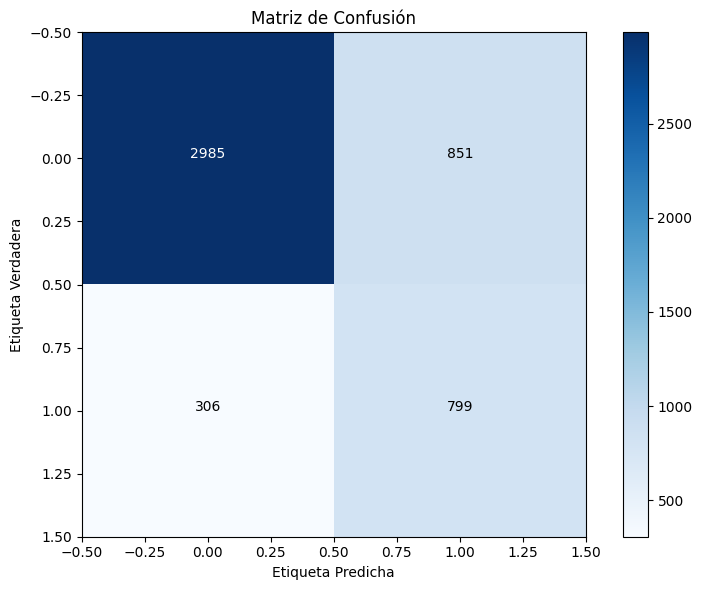

In [38]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Matriz de Confusión')
    plt.colorbar()
    tick_marks = np.arange(2)
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')
    plt.tight_layout()
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)


Conclusión:

- Verdaderos Negativos (TN) = 2985: El modelo predijo correctamente que no llovería en 2985 ocasiones.

- Falsos Positivos (FP) = 851: El modelo predijo lluvia, pero no llovió en 851 casos.

- Falsos Negativos (FN) = 306: El modelo predijo que no llovería, pero en realidad sí llovió en 306 ocasiones.

- Verdaderos Positivos (TP) = 799: El modelo predijo correctamente que llovería en 799 ocasiones.

El modelo tiene un desempeño razonable en términos generales. Es bueno detectando días sin lluvia, pero tiene dificultades para predecir lluvia de manera precisa.

## AUC-ROC

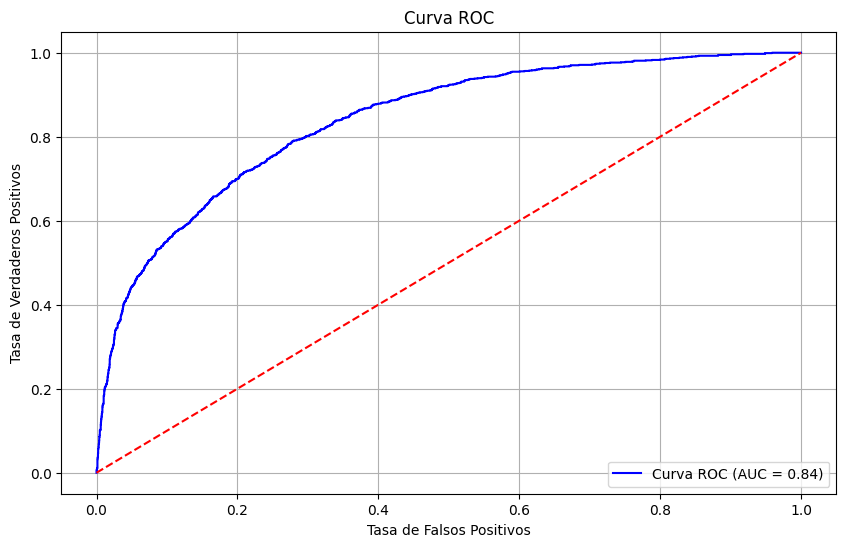

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

El AUC (Área bajo la curva) es de 0.84, lo que sugiere un buen rendimiento del modelo en general, ya que un AUC cercano a 1 indica un buen modelo.

In [40]:
best_f1 = 0
best_threshold = 0.5  # Umbral predeterminado

for threshold in thresholds:
    y_pred_threshold = (y_proba >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"Mejor umbral: {best_threshold:.2f} con un F1 Score de {best_f1:.2f}")

Mejor umbral: 0.58 con un F1 Score de 0.59


Conclusión:

1. Mejor Umbral: 0.58

Este valor representa el umbral de probabilidad al clasificar según la clase. Si el modelo predice que la probabilidad de lluvia es 0.58 o más, se clasifica como (1); si es menos de 0.58, se clasifica como (0).

2. F1 Score: 0.59

Indica que el rendimiento del modelo en la clasificación de los días con lluvia es moderado.Esto sugiere que el modelo es capaz de identificar algunas instancias de lluvia correctamente, pero hay margen para mejorar, ya que no está alcanzando un nivel óptimo.

Se podrian hacer ajustes, como el uso de GridSearchCV o RandomizedSearchCV para mejorar este valor.

# Modelo Base

In [41]:
model_base = DummyClassifier(strategy='stratified', random_state = 42)
model_base.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones y probabilidades en el conjunto de prueba
y_pred_base = model_base.predict(X_test_cuantitativo)
y_proba_base = model_base.predict_proba(X_test_cuantitativo)[:, 1]

In [42]:
# Calcular las métricas para cada clase
accuracy = accuracy_score(y_test, y_pred_base)

precision_0 = precision_score(y_test, y_pred_base, pos_label=0)
recall_0 = recall_score(y_test, y_pred_base, pos_label=0)
f1_0 = f1_score(y_test, y_pred_base, pos_label=0)

precision_1 = precision_score(y_test, y_pred_base, pos_label=1)
recall_1 = recall_score(y_test, y_pred_base, pos_label=1)
f1_1 = f1_score(y_test, y_pred_base, pos_label=1)

# Mostrar los resultados
print(f"\nPrecisión general (Accuracy): {accuracy:.2f}")
print("Clase 0.0:")
print(f"  Precisión: {precision_0:.2f}")
print(f"  Recall: {recall_0:.2f}")
print(f"  F1-score: {f1_0:.2f}")

print("Clase 1.0:")
print(f"  Precisión: {precision_1:.2f}")
print(f"  Recall: {recall_1:.2f}")
print(f"  F1-score: {f1_1:.2f}")


Precisión general (Accuracy): 0.49
Clase 0.0:
  Precisión: 0.76
  Recall: 0.49
  F1-score: 0.60
Clase 1.0:
  Precisión: 0.21
  Recall: 0.48
  F1-score: 0.29


Conclusión:
1. Métrica General

- Accuracy 0.49: El modelo predice correctamente si va a llover o no en el 49% de las veces.

2. Métricas por Clase:

**-- Clase 0.0: No lloverá**

- Precisión 0.76: De todas las veces que el modelo predijo que no lloverá, acertó el 76% de las veces. Pocos falsos positivos.

- Recall 0.49: De todas las veces que efectivamente no llovió, el modelo acertó en el 49%. Muchos falsos negativos.

- F1-score 0.60: El modelo no tiene un rendimiento sólido ni en precisión ni en recall para la clase negativa.

**-- Clase 1.0: Lloverá**

- Precisión 0.21: De todas las veces que el modelo predijo lluvia, solo el 21% fueron predicciones correctas. Muchos falsos positivos.

- Recall 0.48: De todas las veces que efectivamente llovió, el modelo acertó en el 48%. Presencia de falsos negativos.

- F1-score 0.29: El modelo tiene dificultades tanto para hacer predicciones precisas como para capturar los casos positivos.

3. Análisis General

El modelo no tiene un buen desempeño general. Modelo ineficaz.

## Matriz de confusión

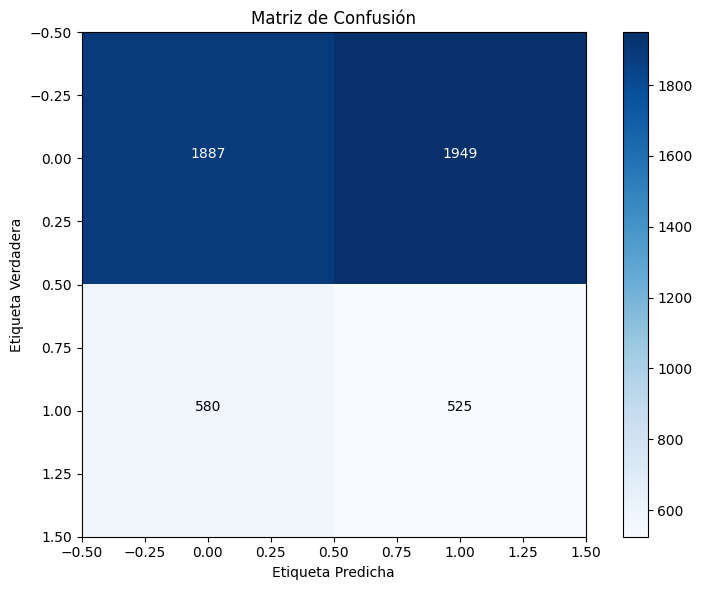

In [43]:
cm_base = confusion_matrix(y_test, y_pred_base)
plot_confusion_matrix(cm_base)

Conclusión:

- Verdaderos Negativos (TN) = 1887: El modelo predijo correctamente que no llovería en 1887 ocasiones.

- Falsos Positivos (FP) = 1949: El modelo predijo lluvia, pero no llovió en 1949 casos.

- Falsos Negativos (FN) = 580: El modelo predijo que no llovería, pero en realidad sí llovió en 580 ocasiones.

- Verdaderos Positivos (TP) = 525: El modelo predijo correctamente que llovería en 525 ocasiones.

El modelo tiene un desempeño deficiente en términos generales. Funciona razonablemente bien detectando la clase negativa (clase 0), pero muestra importantes dificultades para identificar correctamente la clase positiva (clase 1).

## AUC-ROC

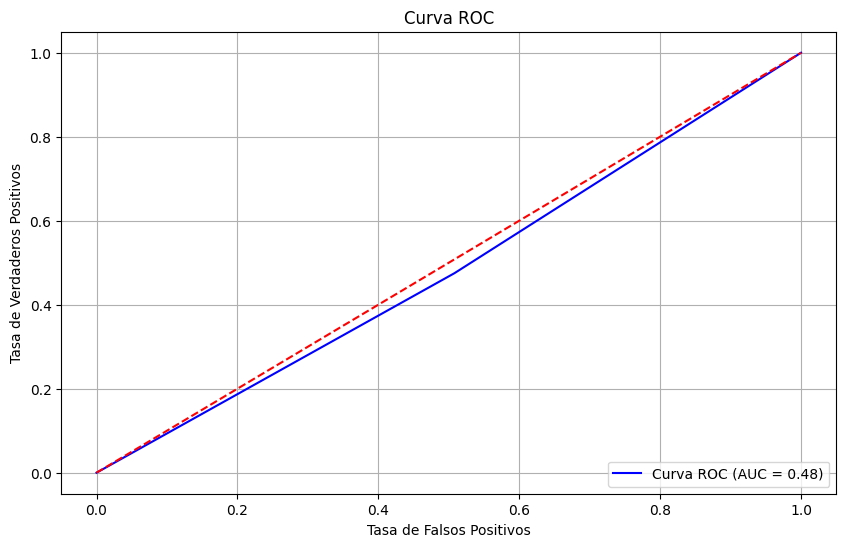

In [44]:
fpr_base, tpr_base, thresholds_base = roc_curve(y_test, y_proba_base)
roc_auc_base = auc(fpr_base, tpr_base)

plt.figure(figsize=(10, 6))
plt.plot(fpr_base, tpr_base, color='blue', label=f'Curva ROC (AUC = {roc_auc_base:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()

El AUC (Área bajo la curva) es de 0.48, lo que sugiere un MAL rendimiento del modelo en general, practicamente no predice la clase (2).

In [45]:
best_f1_base = 0
best_threshold_base = 0.5  # Umbral predeterminado

for threshold_base in thresholds_base:
    y_pred_threshold = (y_pred_base >= threshold_base).astype(int)
    f1 = f1_score(y_test, y_pred_threshold)
    if f1 > best_f1_base:
        best_f1_base = f1
        best_threshold_base = threshold_base

print(f"Mejor umbral: {best_threshold_base:.2f} con un F1 Score de {best_f1_base:.2f}")

Mejor umbral: 0.00 con un F1 Score de 0.37


Conclusión:

1. Mejor Umbral: 0.00

Si el modelo predice que la probabilidad de lluvia es 0.00 o más, se clasifica como (1); si es menos de 0.00, se clasifica como (0).
Sin embargo, un umbral de 0.00 significa que el modelo clasifica casi todas las instancias como positivas.

2. F1 Score: 0.37

Indica que el rendimiento del modelo en la clasificación de los días con lluvia es bajo. Esto sugiere que el modelo tiene una capacidad limitada para identificar correctamente las instancias de esta clase